In [186]:
# Import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [187]:
df_cleaned = pd.read_csv('cleaned_data.csv')

In [188]:
df_cleaned.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Time,Species,Source,original order,Month,Day,Ocean_Sea,Continent
0,2024-09-16,2024,Unprovoked,morocco,Southern Morocco,West Of Dakhla,Swimming Jumped Off Yacht,German Tourist,F,28,Leg severed,Afternoon,White Shark,Andy Currie: Moroccan World News: Sky News,undefined,9,16,Atlantic Ocean,Africa
1,2024-08-26,2024,Unprovoked,jamaica,Montego Bay,Falmouth,Spearfishing,Jahmari Reid,M,28,Head right arm and leg severed,Afternoon,Tiger Shark,Todd Smith: Daily Mail UK: Sky News: People .com,undefined,8,26,Caribbean Sea,North America
2,2024-08-06,2024,Unprovoked,belize,Gulf Of Honduras,Central America,Swimming Diving,Annabelle Carlson,F,28,Right lower leg amputated after serious bite,Morning,Reef Shark,Kevin McMurray Tracking Sharks.com New York Po...,undefined,8,6,Caribbean Sea,North America
3,2024-07-23,2024,Unprovoked,australia,Nsw,"North Shore Beach, Port Macquarie",Surfing,Kai McKenzie,M,28,Serious injury to leg,Morning,White Shark,Nine.com.au: ABC.Net.Au Johannes Marchand,undefined,7,23,Indian Ocean and Pacific Ocean,Oceania
4,2024-07-18,2024,Unprovoked,australia,Western Australia,Trigg Beach Sterling,Surfing,Ryan Lowther,M,28,Minor injury to lower left leg,Afternoon,Shall Shark,Daily Mail: Sky News: The West Australian,undefined,7,18,Indian Ocean and Pacific Ocean,Oceania


### Summary Statistics

In [189]:
# Display statistical age
df_cleaned['Age'].describe().round(2)

count    5084.00
mean       28.08
std         7.79
min         3.00
25%        28.00
50%        28.00
75%        28.00
max        87.00
Name: Age, dtype: float64

In [190]:
df_cleaned.describe(include=["O"])

,Date,Type,Country,State,Location,Activity,Name,Sex,Injury,Time,Species,Source,original order,Ocean_Sea,Continent
count,5084,5084,5084,5084,5083,5084,5084,5084,5083,5084,5084,5084,5084,5084,5084
unique,4421,6,90,550,3404,1064,4330,2,2918,3,473,3985,4936,24,6
top,1958-01-01,Unprovoked,usa,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,Fatal,Afternoon,undefined,"K. McMurray, TrackingSharks.com",undefined,Atlantic Ocean and Pacific Ocean,North America
freq,7,4233,2127,1214,448,1219,497,4435,638,3591,2427,119,148,2127,2425


In [191]:
# Show the information of the dataset
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5084 entries, 0 to 5083
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            5084 non-null   object
 1   Year            5084 non-null   int64 
 2   Type            5084 non-null   object
 3   Country         5084 non-null   object
 4   State           5084 non-null   object
 5   Location        5083 non-null   object
 6   Activity        5084 non-null   object
 7   Name            5084 non-null   object
 8   Sex             5084 non-null   object
 9   Age             5084 non-null   int64 
 10  Injury          5083 non-null   object
 11  Time            5084 non-null   object
 12  Species         5084 non-null   object
 13  Source          5084 non-null   object
 14  original order  5084 non-null   object
 15  Month           5084 non-null   int64 
 16  Day             5084 non-null   int64 
 17  Ocean_Sea       5084 non-null   object
 18  Continen

### Visualizations

#### For numerical continuous variables

In [192]:
sns.set_style('whitegrid')

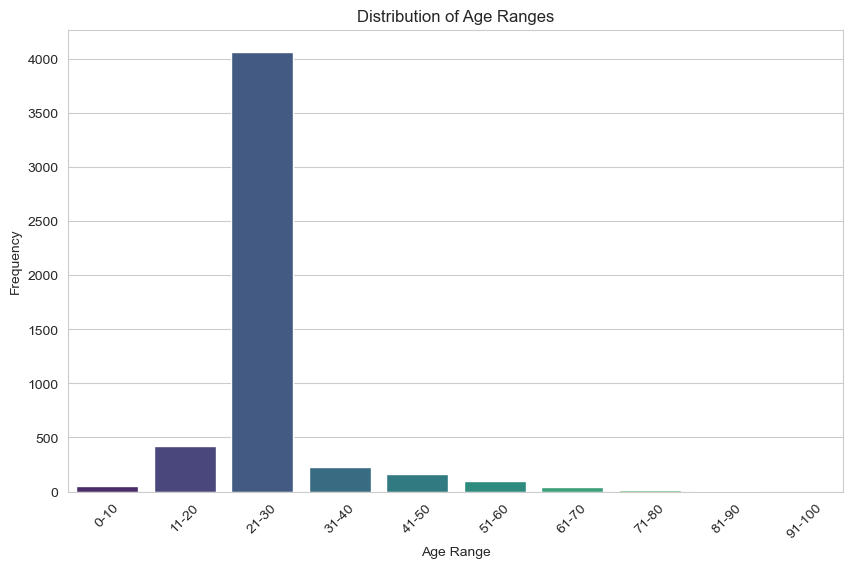

In [193]:
# Plot 1: Distribution the ages
# Crear rangos de edades
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df_cleaned['AgeRange'] = pd.cut(df_cleaned['Age'], bins=bins, labels=labels, right=False)

# Graficar la distribución de los rangos de edades
plt.figure(figsize=(10,6))
sns.countplot(x='AgeRange', data=df_cleaned, palette='viridis')
plt.title('Distribution of Age Ranges')
plt.xlabel('Age Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

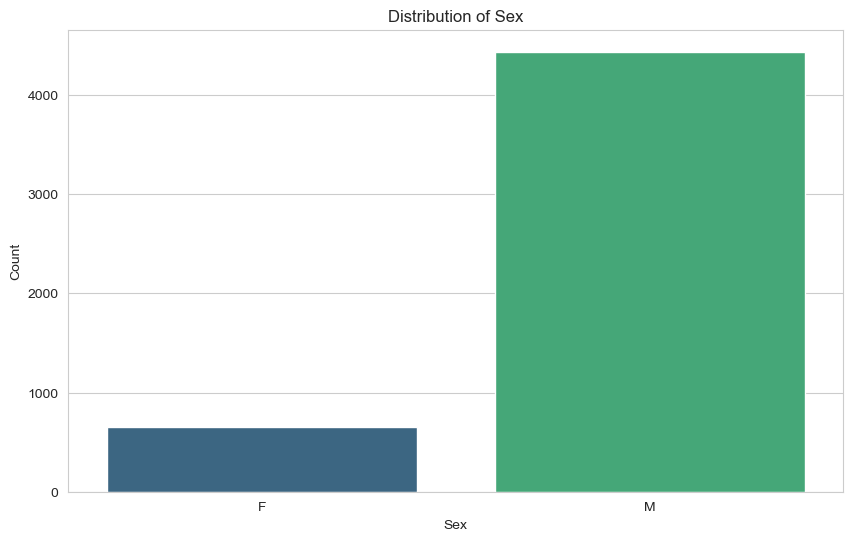

In [194]:
# Plot 2: Countplot del Sexo
plt.figure(figsize=(10,6))
sns.countplot(x='Sex', data=df_cleaned, palette='viridis')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

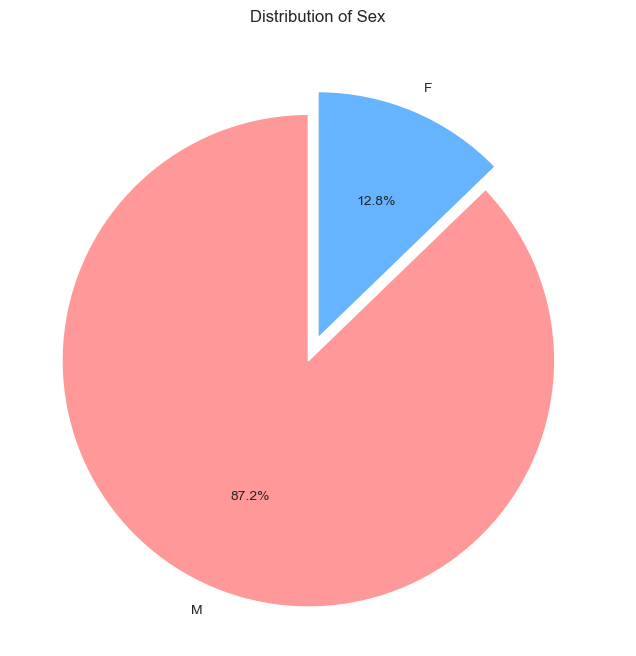

In [195]:
# Plot 3: Pie Chart del Sexo
plt.figure(figsize=(8,8))
df_cleaned['Sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90, explode=(0.1, 0))
plt.title('Distribution of Sex')
plt.ylabel('') 
plt.show()

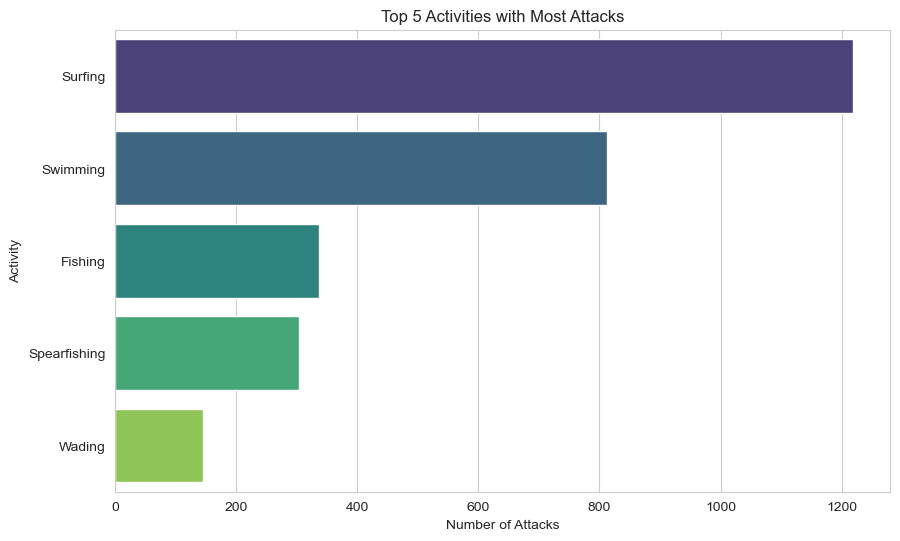

In [196]:
# Plot 4: Activities with Most Attacks
# Paso 1: Agrupar los datos por actividad y contar los ataques
activity_counts = df_cleaned['Activity'].value_counts()

# Paso 2: Seleccionar las 5 actividades con más ataques
top_5_activities = activity_counts.head(5)

# Paso 3: Crear el gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=top_5_activities.values, y=top_5_activities.index, palette='viridis')
plt.title('Top 5 Activities with Most Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Activity')
plt.show()

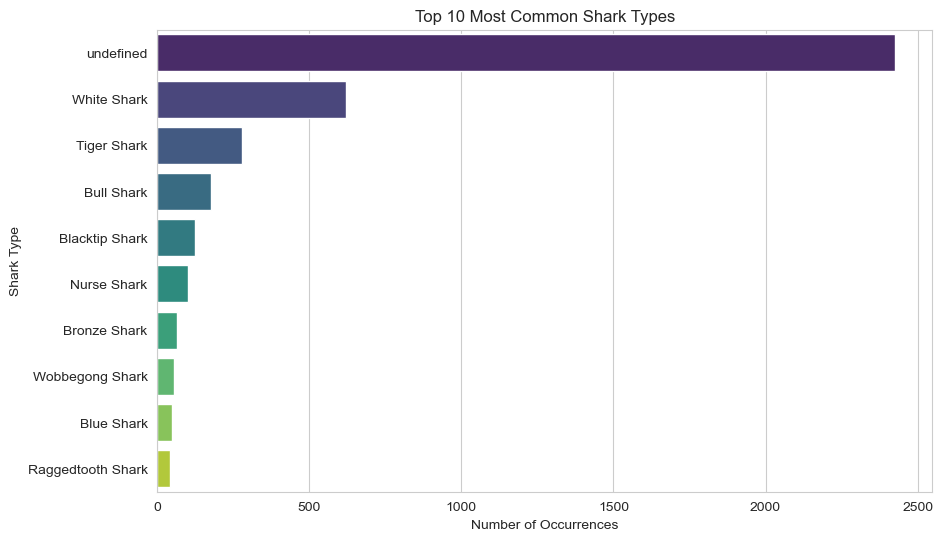

In [197]:
# Plot 5: Top 10 Most Common Shark Types
# Paso 1: Agrupar los datos por tipo de tiburón y contar las ocurrencias
shark_counts = df_cleaned['Species'].value_counts()

# Paso 2: Seleccionar los 10 tipos de tiburones más comunes
top_5_sharks = shark_counts.head(10)

# Paso 3: Crear el gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=top_5_sharks.values, y=top_5_sharks.index, palette='viridis')
plt.title('Top 10 Most Common Shark Types')
plt.xlabel('Number of Occurrences')
plt.ylabel('Shark Type')
plt.show()

In [198]:
# Valores únicos de la columna Ocean_Sea
df_cleaned['Ocean_Sea'].unique()

array(['Atlantic Ocean', 'Caribbean Sea',
       'Indian Ocean and Pacific Ocean',
       'Atlantic Ocean and Pacific Ocean', 'Pacific Ocean',
       'Indian Ocean', 'Atlantic Ocean and Indian Ocean',
       'Pacific Ocean and Gulf of Mexico', 'Red Sea',
       'Atlantic Ocean and Mediterranean Sea',
       'Pacific Ocean and Caribbean Sea', 'Indian Ocean and Andaman Sea',
       'Atlantic Ocean, Pacific Ocean, and Arctic Ocean',
       'Mediterranean Sea', 'Indian Ocean and South China Sea',
       'Persian Gulf', 'Red Sea and Persian Gulf',
       'Arctic Ocean and Pacific Ocean', 'South China Sea',
       'Adriatic Sea', 'Atlantic Ocean and Arctic Ocean',
       'Persian Gulf and Caspian Sea', 'Red Sea and Gulf of Aden',
       'Baltic Sea'], dtype=object)

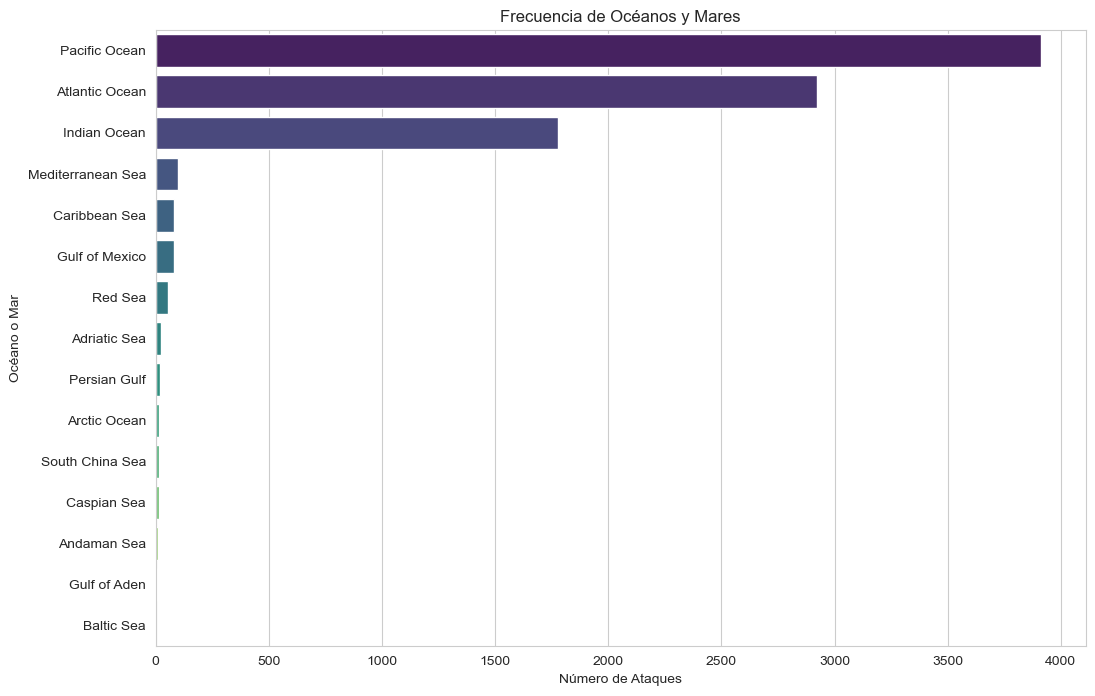

In [199]:
# Plot 6: Countplot de los Océanos
# Paso 1: Asegurarse de que todos los valores en 'Ocean_Sea' sean cadenas de texto y no nulos
df_cleaned['Ocean_Sea'] = df_cleaned['Ocean_Sea'].astype(str).fillna('')

# Paso 2: Reemplazar comas con 'and'
df_cleaned['Ocean_Sea'] = df_cleaned['Ocean_Sea'].str.replace(', ', ' and ')

# Paso 3: Separar las combinaciones de océanos y mares
df_cleaned['Ocean_Sea'] = df_cleaned['Ocean_Sea'].str.split(' and ')
df_exploded = df_cleaned.explode('Ocean_Sea')

# Paso 4: Eliminar espacios en blanco adicionales y la palabra 'and'
df_exploded['Ocean_Sea'] = df_exploded['Ocean_Sea'].str.strip()
df_exploded['Ocean_Sea'] = df_exploded['Ocean_Sea'].str.replace('and', '', regex=False).str.strip()

# Paso 5: Contar la frecuencia de cada océano o mar
ocean_counts = df_exploded['Ocean_Sea'].value_counts()

# Paso 6: Crear el gráfico de barras horizontal
plt.figure(figsize=(12,8))
sns.barplot(y=ocean_counts.index, x=ocean_counts.values, palette='viridis', orient='h')
plt.title('Frecuencia de Océanos y Mares')
plt.xlabel('Número de Ataques')
plt.ylabel('Océano o Mar')
plt.xticks(rotation=0)
plt.show()

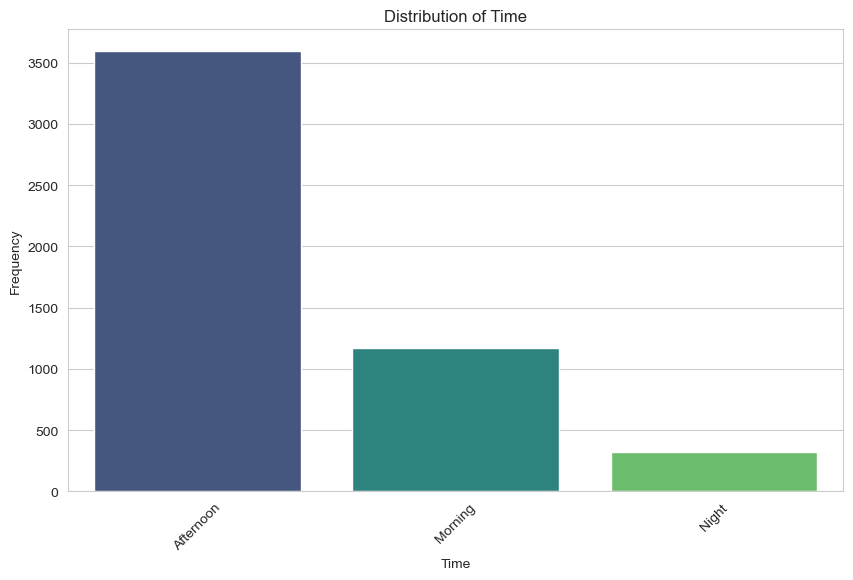

In [200]:
# Plot 7: Distribution of Time
# Paso 2: Crear el gráfico de barras
plt.figure(figsize=(10,6))
sns.countplot(x='Time', data=df_cleaned, palette='viridis')
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

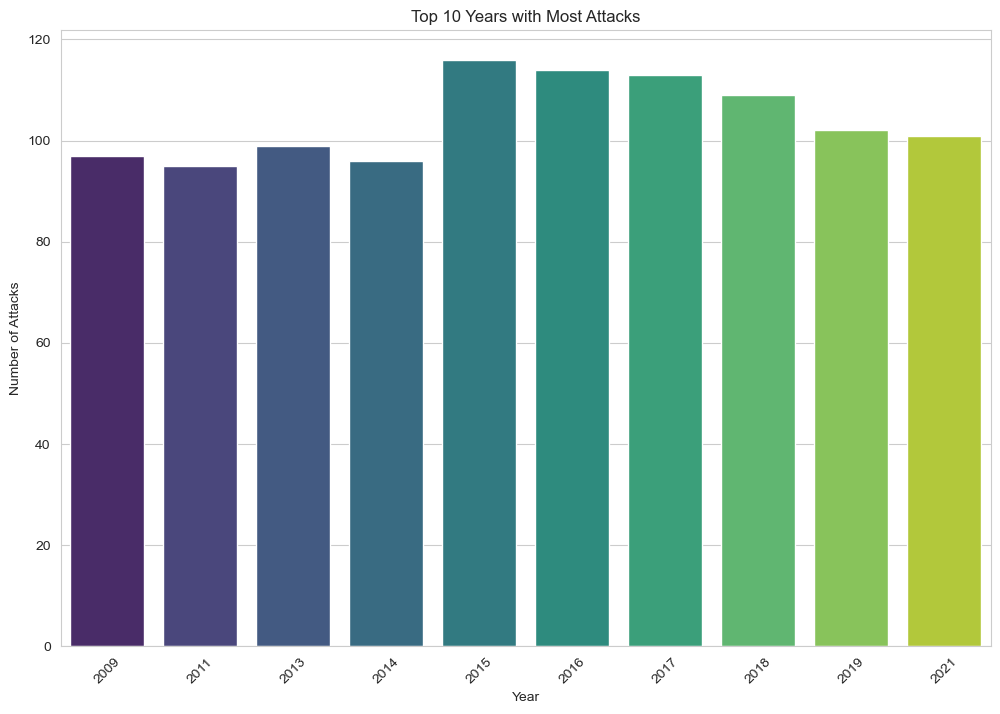

In [201]:
# Plot 8: Top 10 Years with Most Attacks
# Paso 1: Convertir la columna 'Date' a formato de fecha y extraer el año
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')
df_cleaned['Year'] = df_cleaned['Date'].dt.year

# Paso 2: Contar el número de ataques por año
year_counts = df_cleaned['Year'].value_counts()

# Paso 3: Seleccionar los 10 años con más ataques
top_10_years = year_counts.head(10)

# Paso 4: Ordenar los valores 
top_10_years = top_10_years.sort_values(ascending=False)

# Paso 5: Crear el gráfico de barras
plt.figure(figsize=(12,8))
sns.barplot(x=top_10_years.index, y=top_10_years.values, palette='viridis')
plt.title('Top 10 Years with Most Attacks')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

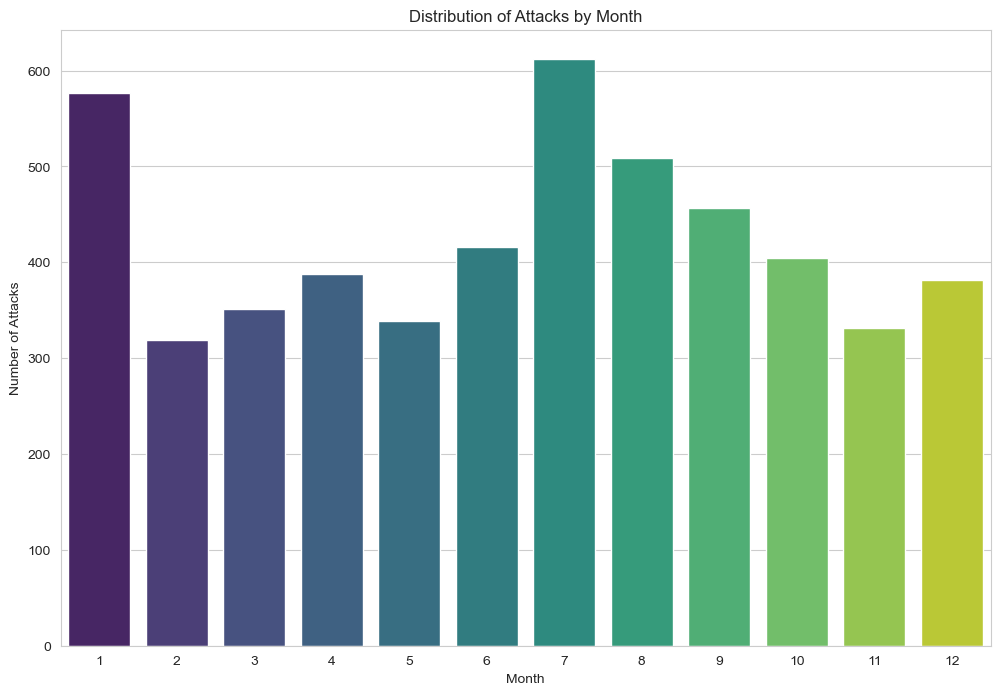

In [202]:
# Plot 9: Distribution of Attacks by Month
# Paso 1: Convertir la columna 'Date' a formato de fecha y extraer el mes
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')
df_cleaned['Month'] = df_cleaned['Date'].dt.month

# Paso 2: Contar el número de ataques por mes
month_counts = df_cleaned['Month'].value_counts().sort_index()

# Paso 3: Crear el gráfico de barras
plt.figure(figsize=(12,8))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')
plt.title('Distribution of Attacks by Month')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.show()

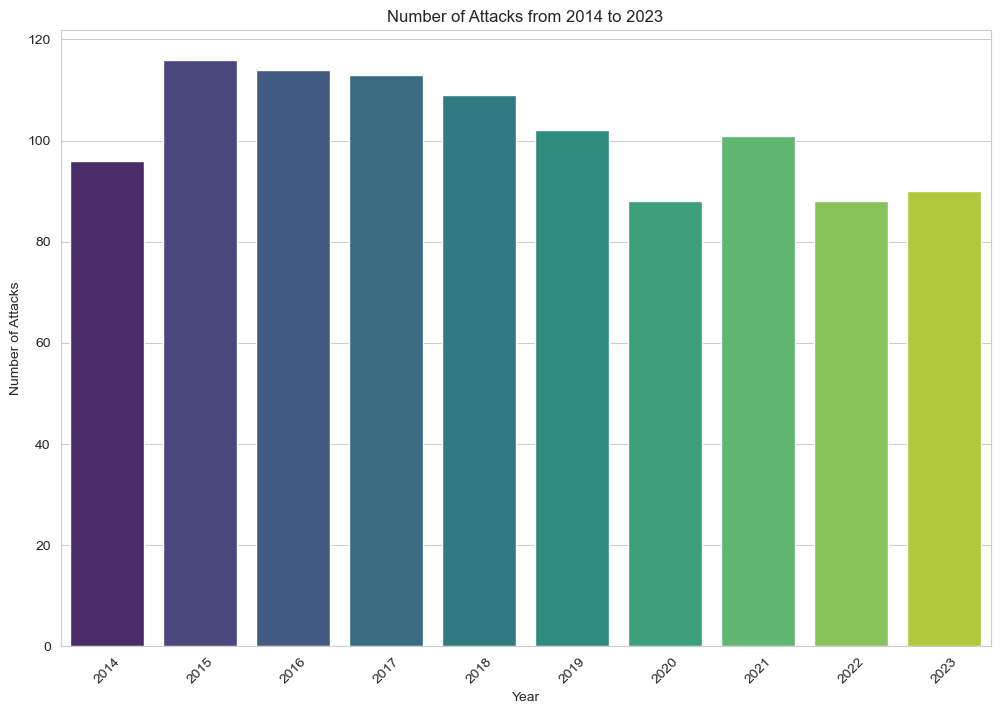

In [203]:
# Number of Attacks in the Last 10 Years
# Paso 1: Convertir la columna 'Date' a formato de fecha y extraer el año
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')
df_cleaned['Year'] = df_cleaned['Date'].dt.year

# Paso 2: Filtrar los datos para los años 2014 a 2023
filtered_years = df_cleaned[(df_cleaned['Year'] >= 2014) & (df_cleaned['Year'] <= 2023)]

# Paso 3: Contar el número de ataques por año en el rango filtrado
year_counts = filtered_years['Year'].value_counts().sort_index()

# Paso 4: Crear el gráfico de barras
plt.figure(figsize=(12,8))
sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')
plt.title('Number of Attacks from 2014 to 2023')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

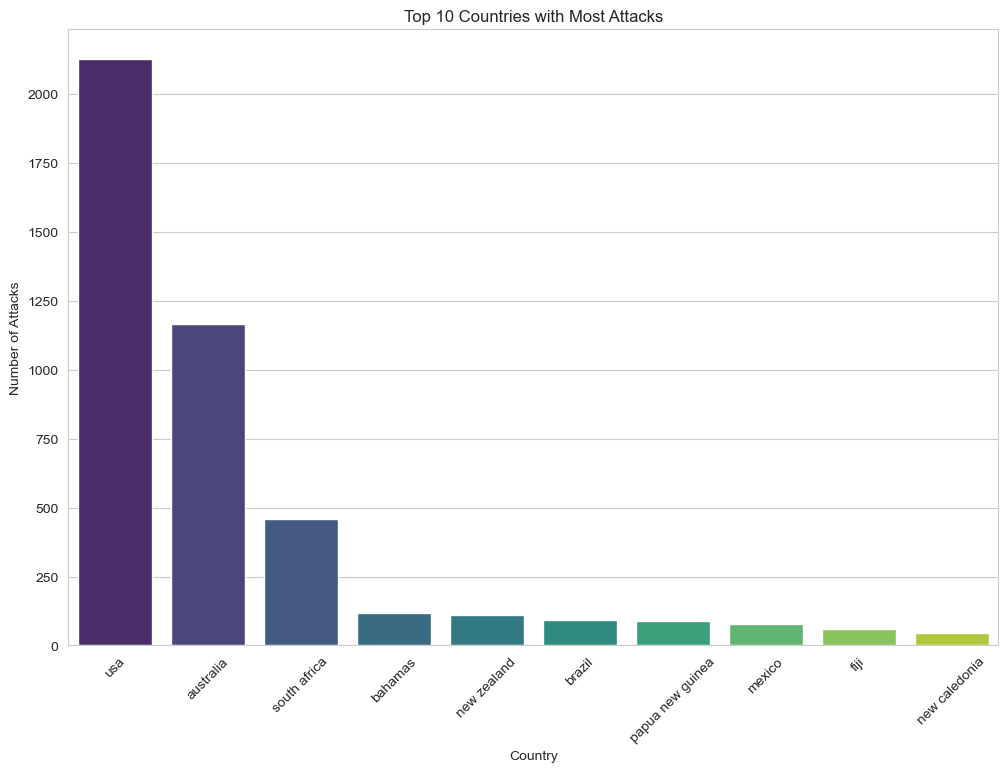

In [204]:
# Plot 10: Top 10 Countries with Most Attacks
# Paso 1: Contar la frecuencia de ataques por país
country_counts = df_cleaned['Country'].value_counts().head(10)

# Paso 2: Crear el gráfico de barras
plt.figure(figsize=(12,8))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title('Top 10 Countries with Most Attacks')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

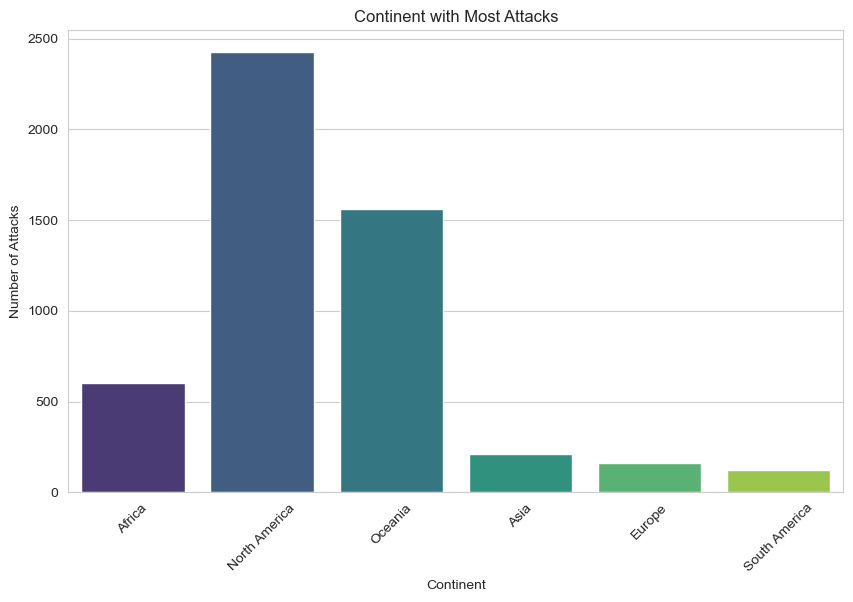

In [206]:
# Plot of Continent with Most Attacks
plt.figure(figsize=(10,6))
sns.countplot(x='Continent', data=df_cleaned, palette='viridis')
plt.title('Continent with Most Attacks')
plt.xlabel('Continent')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

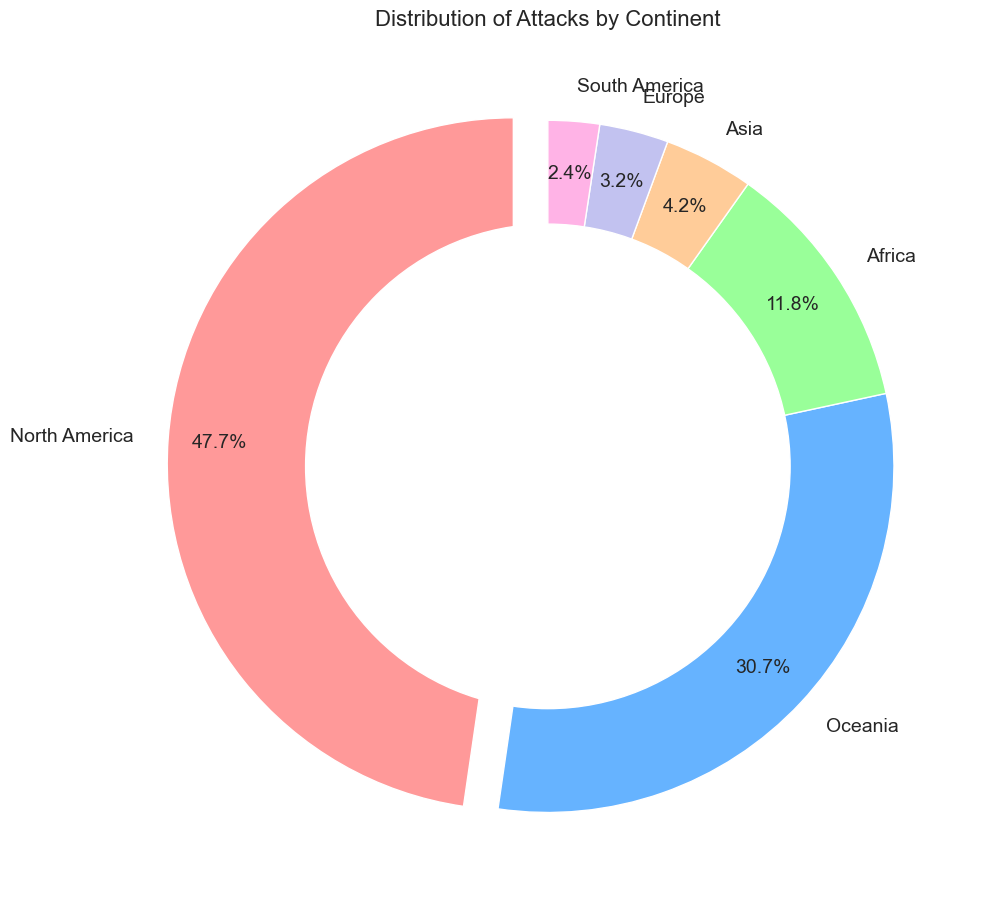

In [211]:
# Plot Circular de Continentes
plt.figure(figsize=(10,10))

# Contar el número de categorías en la columna 'Continent'
num_categories = df_cleaned['Continent'].nunique()

# Crear una lista de ceros con la misma longitud que el número de categorías
explode = [0.1] + [0] * (num_categories - 1)

# Graficar el pie chart
df_cleaned['Continent'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0', '#ffb3e6'],
    startangle=90, 
    explode=explode,
    pctdistance=0.85,  # Ajustar la distancia del texto de porcentaje
    textprops={'fontsize': 14}  # Ajustar el tamaño de fuente del texto
)

# Dibujar un círculo en el centro para hacer un gráfico de dona
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Añadir título y ajustar el gráfico
plt.title('Distribution of Attacks by Continent', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

#### Relationshsip between variables

In [205]:
df_cleaned.groupby(['Sex', 'Ocean_Sea']).agg({'Age': 'mean'})

TypeError: unhashable type: 'list'

In [22]:
df_cleaned.groupby(['Sex', 'Ocean_Sea']).agg({'Type': 'count'})

Type
Sex Ocean_Sea                                            
F   Adriatic Sea                                        8
    Atlantic Ocean                                     33
    Atlantic Ocean and Indian Ocean                    22
    Atlantic Ocean and Mediterranean Sea               10
    Atlantic Ocean and Pacific Ocean                  363
    Atlantic Ocean, Pacific Ocean, and Arctic Ocean     2
    Caribbean Sea                                       7
    Indian Ocean                                       10
    Indian Ocean and Andaman Sea                        1
    Indian Ocean and Pacific Ocean                     98
    Indian Ocean and South China Sea                    2
    Mediterranean Sea                                   4
    Pacific Ocean                                      59
    Pacific Ocean and Caribbean Sea                     4
    Pacific Ocean and Gulf of Mexico                   11
    Persian Gulf and Caspian Sea                        1
    Red Sea                                            15
    Red Sea and Gulf of Aden                            1
    South China Sea                                     4
M   Adriatic Sea                                       15
    Arctic Ocean and Pacific Ocean                      4
    Atlantic Ocean                                    251
    Atlantic Ocean and Arctic Ocean                     1
    Atlantic Ocean and Indian Ocean                   438
    Atlantic Ocean and Mediterranean Sea               28
    Atlantic Ocean and Pacific Ocean                 1759
    Atlantic Ocean, Pacific Ocean, and Arctic Ocean    10
    Baltic Sea                                          1
    Caribbean Sea                                      78
    Indian Ocean                                      121
    Indian Ocean and Andaman Sea                       10
    Indian Ocean and Pacific Ocean                   1078
    Indian Ocean and South China Sea                    1
    Mediterranean Sea                                  58
    Mediterranean Sea and Black Sea                     9
    Pacific Ocean                                     482
    Pacific Ocean and Caribbean Sea                    46
    Pacific Ocean and Gulf of Mexico                   68
    Persian Gulf                                        3
    Persian Gulf and Caspian Sea                       13
    Red Sea                                            33
    Red Sea and Gulf of Aden                            4
    Red Sea and Persian Gulf                            2
    South China Sea                                    10

### Species vs Location

In [58]:
ocean_species = df_ocean_sepecies = df_cleaned.groupby(['Ocean_Sea', 'Species']).agg({'Name': 'count'}).reset_index()

In [52]:
ocean_species

,Ocean_Sea,Species,Name
0,Adriatic Sea,1.5 m [5'] shark,1
1,Adriatic Sea,20 kg shark,1
2,Adriatic Sea,6 m shark,1
3,Adriatic Sea,Doubtful / Unconfirmed attack / Unable to veri...,1
4,Adriatic Sea,White Shark,11
...,...,...,...
798,Red Sea and Gulf of Aden,undefined,4
799,Red Sea and Persian Gulf,undefined,2
800,South China Sea,20 to 30kg shark,2
801,South China Sea,White Shark,1


In [53]:
ocean_num_attacks = df_cleaned.groupby(['Ocean_Sea']).agg({'Name': 'count'}).reset_index()

In [54]:
ocean_num_attacks

,Ocean_Sea,Name
0,Adriatic Sea,23
1,Arctic Ocean and Pacific Ocean,4
2,Atlantic Ocean,284
3,Atlantic Ocean and Arctic Ocean,1
4,Atlantic Ocean and Indian Ocean,460
5,Atlantic Ocean and Mediterranean Sea,38
6,Atlantic Ocean and Pacific Ocean,2122
7,"Atlantic Ocean, Pacific Ocean, and Arctic Ocean",12
8,Baltic Sea,1
9,Caribbean Sea,85


In [89]:
# me quedo con los 10 que mas tienen
total_ocean = ocean_num_attacks.sort_values(by = "Name", ascending= False).head(10)

In [90]:
total_ocean

,Ocean_Sea,Name
6,Atlantic Ocean and Pacific Ocean,2122
12,Indian Ocean and Pacific Ocean,1176
16,Pacific Ocean,541
4,Atlantic Ocean and Indian Ocean,460
2,Atlantic Ocean,284
10,Indian Ocean,131
9,Caribbean Sea,85
18,Pacific Ocean and Gulf of Mexico,79
14,Mediterranean Sea,62
17,Pacific Ocean and Caribbean Sea,50


In [91]:
species_num_attacks = df_cleaned.groupby(['Species']).agg({'Name': 'count'}).reset_index()

In [95]:
total_species = species_num_attacks.sort_values(by = "Name", ascending= False).head(15)
total_species

,Species,Name
578,undefined,2506
526,White Shark,623
511,Tiger Shark,286
351,Bull Shark,181
340,Blacktip Shark,125
414,Nurse Shark,102
347,Bronze Shark,64
341,Blue Shark,49
399,Lemon Shark,42
405,Mako Shark,42


In [93]:
list_species = total_species['Species'].tolist()

In [57]:
list_ocean = total_ocean['Ocean_Sea'].tolist()

In [77]:
df_ocean_1 = df_ocean_sepecies[df_ocean_sepecies['Ocean_Sea'].isin(list_ocean)]
df_ocean_1.sort_values(by="Name", ascending= False)

,Ocean_Sea,Species,Name
428,Atlantic Ocean and Pacific Ocean,undefined,1008
654,Indian Ocean and Pacific Ocean,undefined,532
756,Pacific Ocean,undefined,321
414,Atlantic Ocean and Pacific Ocean,White Shark,211
624,Indian Ocean and Pacific Ocean,White Shark,158
...,...,...,...
303,Atlantic Ocean and Pacific Ocean,60 cm [2'] captive shark,1
304,Atlantic Ocean and Pacific Ocean,60 cm to 90 cm [2' to 3'] shark,1
305,Atlantic Ocean and Pacific Ocean,650-lb shark,1
306,Atlantic Ocean and Pacific Ocean,"68"" shark",1


In [88]:
df_cleaned['Species'].value_counts()

Species
undefined                                                                    2506
White Shark                                                                   623
Tiger Shark                                                                   286
Bull Shark                                                                    181
Blacktip Shark                                                                125
                                                                             ... 
1.8 m [6'] reef shark - or a 2.1 m to 2.4 m [7' to 8'] grey-colored shark       1
3.7 m to 4.3 m [12' to 14'] shark                                               1
106 cm [3.5']  shark                                                            1
1.2 m [4'] "grey-colored shark"                                                 1
"A pack of sharks"                                                              1
Name: count, Length: 580, dtype: int64

In [94]:
list_species

['undefined',
 'White Shark',
 'Tiger Shark',
 'Bull Shark',
 'Blacktip Shark',
 'Nurse Shark',
 'Bronze Shark',
 'Blue Shark',
 'Lemon Shark',
 'Mako Shark']

In [86]:
species_1 = ['Tiger Shark', 'White Shark', 'Bull Shark', 'Hammerhead Shark', 'Great White Shark', 
                 'Mako Shark', 'Blacktip Shark', 'Reef Shark', 'Nurse Shark', 'Whale Shark', 'Tiger Shark']

In [87]:
df_ocean_1[df_ocean_1['Species'].isin(species_1)]

,Ocean_Sea,Species,Name
35,Atlantic Ocean,Blacktip Shark,7
37,Atlantic Ocean,Bull Shark,19
41,Atlantic Ocean,Hammerhead Shark,1
46,Atlantic Ocean,Mako Shark,2
47,Atlantic Ocean,Nurse Shark,9
55,Atlantic Ocean,Tiger Shark,21
58,Atlantic Ocean,White Shark,8
117,Atlantic Ocean and Indian Ocean,Blacktip Shark,10
119,Atlantic Ocean and Indian Ocean,Bull Shark,3
123,Atlantic Ocean and Indian Ocean,Hammerhead Shark,3


Date        Year  Type         Country         State                  Location                                  Activity                     Name                                    Sex  Age  Injury                                                                      Time       Species                                  Source                                                        original order  Month  Day  Ocean_Sea                           
1767-01-01  1767  Unconfirmed  france          Côte DAzur             St. Tropez                                Bathing                      Samuel Matthews                         M    28   Lacerations to arm  leg                                                     Afternoon  Description of shark does not ring true  undefined                                                     162.0           1      1    Atlantic Ocean and Mediterranean Sea    1
2008-06-26  2008  Unprovoked   usa             South Carolina         Isle Of Palms, Charleston County 